In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv("/content/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


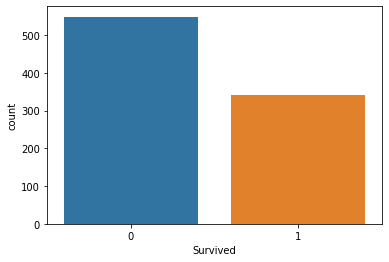

In [6]:
sns.countplot(train_data.Survived)

In [7]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

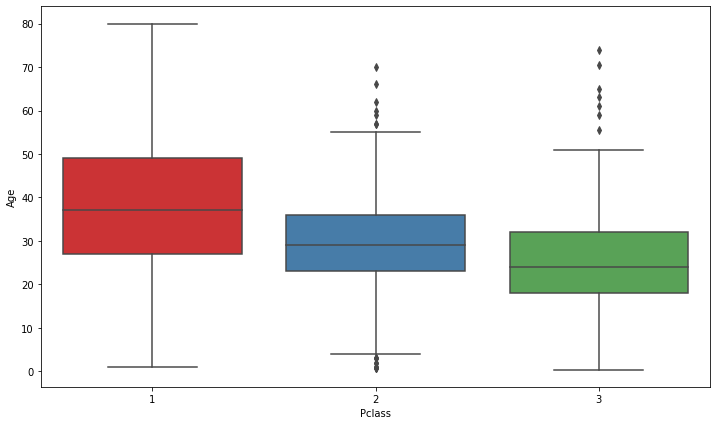

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='Set1')

###The median of the Age is different for each Pclass (Passenger Class) and is highest for Pclass 1

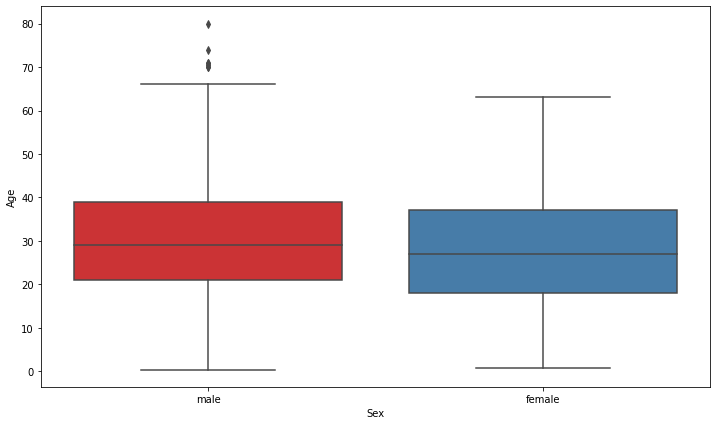

In [9]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sex',y='Age',data=train_data,palette='Set1')

###There is not much change in the median values of Age of male and female

In [10]:
train_data.Sex = train_data.Sex.map({'male':1,'female':0})
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [11]:
train_data = train_data.drop("Name",axis=1)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C


In [12]:
train_data.loc[train_data['Cabin'].notnull(),['Cabin']]=1
train_data.loc[train_data['Cabin'].isnull(),['Cabin']]=0
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,0,35.0,1,0,113803,53.1000,1,S
4,5,0,3,1,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,0,S
887,888,1,1,0,19.0,0,0,112053,30.0000,1,S
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,1,26.0,0,0,111369,30.0000,1,C


In [13]:
embarked = pd.get_dummies(train_data['Embarked'],prefix='Embarked_')
print(embarked.shape)
embarked.head()

(891, 3)


,Embarked__C,Embarked__Q,Embarked__S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
train_data = pd.concat([train_data,embarked],axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked__C,Embarked__Q,Embarked__S
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,0,S,0,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,1,C,1,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,1,S,0,0,1
4,5,0,3,1,35.0,0,0,373450,8.0500,0,S,0,0,1


In [15]:
train_data = train_data.drop(['Embarked'],axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked__C,Embarked__Q,Embarked__S
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,0,35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,3,1,35.0,0,0,373450,8.0500,0,0,0,1


In [16]:
train_data["Family_Members"] = train_data.SibSp + train_data.Parch
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked__C,Embarked__Q,Embarked__S,Family_Members
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,0,0,0,1,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,1,1,0,0,1
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0
3,4,1,1,0,35.0,1,0,113803,53.1000,1,0,0,1,1
4,5,0,3,1,35.0,0,0,373450,8.0500,0,0,0,1,0


In [17]:
train_data = train_data.drop(['SibSp'],axis=1)
train_data = train_data.drop(['Parch'],axis=1)

In [18]:
train_data.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
Age               177
Ticket              0
Fare                0
Cabin               0
Embarked__C         0
Embarked__Q         0
Embarked__S         0
Family_Members      0
dtype: int64

In [19]:
data = train_data[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked__C', 'Embarked__Q', 'Embarked__S', 'Family_Members', 'Survived']]
data

,Pclass,Sex,Age,Fare,Cabin,Embarked__C,Embarked__Q,Embarked__S,Family_Members,Survived
0,3,1,22.0,7.2500,0,0,0,1,1,0
1,1,0,38.0,71.2833,1,1,0,0,1,1
2,3,0,26.0,7.9250,0,0,0,1,0,1
3,1,0,35.0,53.1000,1,0,0,1,1,1
4,3,1,35.0,8.0500,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,13.0000,0,0,0,1,0,0
887,1,0,19.0,30.0000,1,0,0,1,0,1
888,3,0,NaN,23.4500,0,0,0,1,3,0
889,1,1,26.0,30.0000,1,1,0,0,0,1


In [20]:
x = data.drop("Survived",axis=1)
y = data.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [21]:
x.shape

(891, 9)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler_transform = scaler.fit_transform(x[['Age','Fare']])
scaler_transformdf = pd.DataFrame(scaler_transform,columns=['Age_norm','Fare_norm'])
scaler_transformdf.head()
scaler_transformdf.shape

(891, 2)

In [23]:
x = pd.concat([x,scaler_transformdf],axis=1)
x = x.drop(['Age','Fare'],axis=1)
x.head()

,Pclass,Sex,Cabin,Embarked__C,Embarked__Q,Embarked__S,Family_Members,Age_norm,Fare_norm
0,3,1,0,0,0,1,1,0.271174,0.014151
1,1,0,1,1,0,0,1,0.472229,0.139136
2,3,0,0,0,0,1,0,0.321438,0.015469
3,1,0,1,0,0,1,1,0.434531,0.103644
4,3,1,0,0,0,1,0,0.434531,0.015713


In [24]:
x.isna().sum()

Pclass              0
Sex                 0
Cabin               0
Embarked__C         0
Embarked__Q         0
Embarked__S         0
Family_Members      0
Age_norm          177
Fare_norm           0
dtype: int64

In [25]:
from sklearn.impute import KNNImputer

In [26]:
imputer = KNNImputer(n_neighbors=9, weights="distance")
imputer.fit_transform(x)
imputer.fit_transform(x).shape

(891, 9)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(imputer.fit_transform(x), y, test_size=0.2, random_state = 42)
x_train

array([[1.        , 1.        , 1.        , ..., 0.        , 0.56647399,
        0.0556283 ],
       [2.        , 1.        , 0.        , ..., 0.        , 0.28373963,
        0.02537431],
       [3.        , 1.        , 0.        , ..., 0.        , 0.39683338,
        0.01546857],
       ...,
       [3.        , 1.        , 0.        , ..., 2.        , 0.50992712,
        0.02753757],
       [1.        , 0.        , 1.        , ..., 3.        , 0.17064589,
        0.2342244 ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.25860769,
        0.15085515]])

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2', solver = 'liblinear', max_iter = 500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [29]:
lr.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(x_test))

0.8156424581005587

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
kfold =KFold(n_splits=10)
algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes", "RandomForest"]
clfs = [SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(penalty='l2', solver = 'liblinear', max_iter = 500),KNeighborsClassifier(n_neighbors=2),GaussianNB(), RandomForestClassifier()]
cv_results=[]
for classifiers in clfs:
    cv_score = cross_val_score(classifiers,x_test,y_test,cv=kfold,scoring="accuracy")
    cv_results.append(cv_score.mean())
cv_mean = pd.DataFrame(cv_results,index=algos)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
RandomForest,0.827124
Decision Tree,0.810131
Logistic Regression,0.810131
Support Vector Machine,0.787908
Naive Bayes,0.742810
K Nearest Neighbor,0.720261


In [31]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 150, min_samples_leaf = 4, min_samples_split = 4, max_depth = 3, random_state = 1)
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=150, random_state=1)

In [32]:
RF.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, RF.predict(x_test))

0.8212290502793296

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=5,kernel="linear")
clf.fit(x_train,y_train)

SVC(C=5, kernel='linear')

In [ ]:
clf.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [ ]:
accuracy_score(y_test, clf.predict(x_test))

0.7821229050279329

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         
                                                         random_state=42,
                                                         splitter='best'),
                   learning_rate=0.1, n_estimators=500, random_state=None)
abc.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         random_state=42),
                   learning_rate=0.1, n_estimators=500)

In [ ]:
abc.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
accuracy_score(y_test, abc.predict(x_test))

0.8044692737430168

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(max_depth=6)
param_grid = {'learning_rate': [0.001,0.01,0.1,1], 'n_estimators': [10,50,100,200]}
gb = GradientBoostingClassifier()
grid_search = GridSearchCV(gb,param_grid,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, random_state = 0)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, random_state=0)

In [44]:
GBC.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [45]:
accuracy_score(y_test, GBC.predict(x_test))

0.7877094972067039

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth = 3)
param_grid = {'learning_rate': [0.001,0.01,0.1,1], 'n_estimators': [10,50,100,200,500]}
xgbc = XGBClassifier()
grid_search = GridSearchCV(xgbc,param_grid,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [ ]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth = 3, random_state = 1)
xgbc.fit(x_train,y_train)

XGBClassifier(learning_rate=0.05, n_estimators=400, random_state=1)

In [ ]:
xgbc.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [ ]:
accuracy_score(y_test, xgbc.predict(x_test))

0.8212290502793296

###Random Forest Classifier model gave highest training accuracy of 0.82. Hence this model is chosen for predicting survivors of test data

In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data.Sex = test_data.Sex.map({'male':1,'female':0})
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_data = test_data.drop("Name",axis=1)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,1,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_data.loc[test_data['Cabin'].notnull(),['Cabin']]=1
test_data.loc[test_data['Cabin'].isnull(),['Cabin']]=0
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,330911,7.8292,0,Q
1,893,3,0,47.0,1,0,363272,7.0000,0,S
2,894,2,1,62.0,0,0,240276,9.6875,0,Q
3,895,3,1,27.0,0,0,315154,8.6625,0,S
4,896,3,0,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,A.5. 3236,8.0500,0,S
414,1306,1,0,39.0,0,0,PC 17758,108.9000,1,C
415,1307,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,1,NaN,0,0,359309,8.0500,0,S


In [ ]:
embarked = pd.get_dummies(test_data['Embarked'],prefix='Embarked_')
print(embarked.shape)
embarked.head()

(418, 3)


,Embarked__C,Embarked__Q,Embarked__S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [ ]:
test_data = pd.concat([test_data,embarked],axis=1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked__C,Embarked__Q,Embarked__S
0,892,3,1,34.5,0,0,330911,7.8292,0,Q,0,1,0
1,893,3,0,47.0,1,0,363272,7.0000,0,S,0,0,1
2,894,2,1,62.0,0,0,240276,9.6875,0,Q,0,1,0
3,895,3,1,27.0,0,0,315154,8.6625,0,S,0,0,1
4,896,3,0,22.0,1,1,3101298,12.2875,0,S,0,0,1


In [ ]:
test_data = test_data.drop(['Embarked'],axis=1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked__C,Embarked__Q,Embarked__S
0,892,3,1,34.5,0,0,330911,7.8292,0,0,1,0
1,893,3,0,47.0,1,0,363272,7.0000,0,0,0,1
2,894,2,1,62.0,0,0,240276,9.6875,0,0,1,0
3,895,3,1,27.0,0,0,315154,8.6625,0,0,0,1
4,896,3,0,22.0,1,1,3101298,12.2875,0,0,0,1


In [ ]:
test_data["Family_Members"] = test_data.SibSp + test_data.Parch
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked__C,Embarked__Q,Embarked__S,Family_Members
0,892,3,1,34.5,0,0,330911,7.8292,0,0,1,0,0
1,893,3,0,47.0,1,0,363272,7.0000,0,0,0,1,1
2,894,2,1,62.0,0,0,240276,9.6875,0,0,1,0,0
3,895,3,1,27.0,0,0,315154,8.6625,0,0,0,1,0
4,896,3,0,22.0,1,1,3101298,12.2875,0,0,0,1,2


In [ ]:
test_data = test_data.drop(['SibSp'],axis=1)
test_data = test_data.drop(['Parch'],axis=1)

In [ ]:
tdata = test_data[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked__C', 'Embarked__Q', 'Embarked__S', 'Family_Members']]
tdata

,Pclass,Sex,Age,Fare,Cabin,Embarked__C,Embarked__Q,Embarked__S,Family_Members
0,3,1,34.5,7.8292,0,0,1,0,0
1,3,0,47.0,7.0000,0,0,0,1,1
2,2,1,62.0,9.6875,0,0,1,0,0
3,3,1,27.0,8.6625,0,0,0,1,0
4,3,0,22.0,12.2875,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,8.0500,0,0,0,1,0
414,1,0,39.0,108.9000,1,1,0,0,0
415,3,1,38.5,7.2500,0,0,0,1,0
416,3,1,NaN,8.0500,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
tscaler = MinMaxScaler(feature_range=(0,1))
tscaler_transform = tscaler.fit_transform(tdata[['Age','Fare']])
tscaler_transformdf = pd.DataFrame(tscaler_transform,columns=['Age_norm','Fare_norm'])
tscaler_transformdf.head()
tscaler_transformdf.shape

(418, 2)

In [ ]:
tdata = pd.concat([tdata,tscaler_transformdf],axis=1)
tdata = tdata.drop(['Age','Fare'],axis=1)
tdata.head()

,Pclass,Sex,Cabin,Embarked__C,Embarked__Q,Embarked__S,Family_Members,Age_norm,Fare_norm
0,3,1,0,0,1,0,0,0.452723,0.015282
1,3,0,0,0,0,1,1,0.617566,0.013663
2,2,1,0,0,1,0,0,0.815377,0.018909
3,3,1,0,0,0,1,0,0.353818,0.016908
4,3,0,0,0,0,1,2,0.287881,0.023984


In [ ]:
imputer = KNNImputer(n_neighbors=9, weights="distance")
scaled_testdata = imputer.fit_transform(tdata)
scaled_testdata.shape

(418, 9)

In [ ]:
test_output = RF.predict(scaled_testdata)
test_output

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
np.unique(test_output, return_counts = True)

(array([0, 1]), array([300, 118]))

In [ ]:
test_out = test_output.reshape(-1,1)
test_out

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [ ]:
column_values = ['Survived']
df = pd.DataFrame(data = test_out, columns = column_values)
df

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
tdata['Survived'] = df.Survived
tdata

,Pclass,Sex,Cabin,Embarked__C,Embarked__Q,Embarked__S,Family_Members,Age_norm,Fare_norm,Survived
0,3,1,0,0,1,0,0,0.452723,0.015282,0
1,3,0,0,0,0,1,1,0.617566,0.013663,0
2,2,1,0,0,1,0,0,0.815377,0.018909,0
3,3,1,0,0,0,1,0,0.353818,0.016908,0
4,3,0,0,0,0,1,2,0.287881,0.023984,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,0,0,0,1,0,NaN,0.015713,0
414,1,0,1,1,0,0,0,0.512066,0.212559,1
415,3,1,0,0,0,1,0,0.505473,0.014151,0
416,3,1,0,0,0,1,0,NaN,0.015713,0


In [ ]:
tdata['PassengerId'] = test_data['PassengerId']

In [ ]:
Submission = tdata[['PassengerId', 'Survived']]
Submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
import os  
os.makedirs('/content/sample_data', exist_ok=True)  
Submission.to_csv('/content/sample_data/out.csv')